# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Advanced Deep Learning
## Topic   : Mask RCNN - TensorFlow Object Detection API

#### Download a trained model

We will download a trained model from [TensorFlow detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md). If you already have a trained model then you can use the same here.

In [1]:
#Get trained model
!wget -q http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz

In [2]:
!ls -l

total 710352
-rw-r--r-- 1 root root 727390102 Feb 10  2018 mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz
drwxr-xr-x 1 root root      4096 May  6 13:44 sample_data


In [3]:
#Unzip the file
!tar -xf mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz

In [4]:
#check the unzipped files in the folder
!ls -l mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28

total 524868
-rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
-rw-r--r-- 1 345018 5000 266873310 Feb  1  2018 frozen_inference_graph.pb
-rw-r--r-- 1 345018 5000 260030748 Feb  1  2018 model.ckpt.data-00000-of-00001
-rw-r--r-- 1 345018 5000     43391 Feb  1  2018 model.ckpt.index
-rw-r--r-- 1 345018 5000  10496629 Feb  1  2018 model.ckpt.meta
-rw-r--r-- 1 345018 5000      3811 Feb  1  2018 pipeline.config
drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [5]:
!ls -l mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28/saved_model

total 261292
-rw-r--r-- 1 345018 5000 267553754 Feb  1  2018 saved_model.pb
drwxr-xr-x 2 345018 5000      4096 Feb  1  2018 variables


When we export the model (after training), we will get same set of files.

#### Load Model

In [6]:
#This code will work with tf 2.x
import tensorflow as tf

In [7]:
#Check the tf version
tf.__version__

'2.5.0'

In [8]:
#In tf2, we will use saved model rather than frozen_inference_graph.pb
model = tf.saved_model.load('mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28/saved_model')
model = model.signatures['serving_default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [9]:
#Check model's input
model.inputs

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]

Here the model input tensor's name is 'image_tensor' and it has a 4D shape (first dimension is for batch size i.e how many images we will feed).

In [10]:
#Check model's output tensors
model.outputs

[<tf.Tensor 'detection_boxes:0' shape=(None, 100, 4) dtype=float32>,
 <tf.Tensor 'detection_classes:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'detection_masks:0' shape=(None, None, None, None) dtype=float32>,
 <tf.Tensor 'detection_scores:0' shape=(None, 100) dtype=float32>,
 <tf.Tensor 'num_detections:0' shape=(None,) dtype=float32>]

How to understand 4 outputs here:



1.   **num_detections** : Number of prediction boxes we are getting from our model. We limit number of predictions in model configuration file. In this model, output will have top 100 predictions (out of 1000s of anchor boxes). Please note that we get this output after Non-Maximum supression (NMS) step has been completed.
2.   **detection_classes** : Index of the class with highest probability for each predicted box. These index values should be matched with index created using Label Encoder during training time. The values will between 1 to number of classes.
3.   **detection_scores** : Probability value for highest probability class for each box. The value will be between 0 to 1. This indicates how confident model of a real object in the box.
4.   **detection_boxes** : Boundary box co-ordinates for each predicted box. For each predicted box, we get 4 outputs i.e ymin, xmin, ymax, xmax. Please note that these are normalized values.

5. **detection_masks** : Masks for each detected box



#### Load Class labels

Label dictionary (class index to class name mapping) should be taken from training module. Here is the dictionary which was used for this model.

In [11]:
all_classes = {1 : 'person' , 2: 'bicycle' , 3: 'car' , 4: 'motorcycle' , 5: 'airplane' , 6: 'bus' , 7: 'train' , 
               8: 'truck' , 9: 'boat' , 10: 'traffic light' , 11: 'fire hydrant' , 13: 'stop sign' , 14: 'parking meter' , 
               15: 'bench' , 16: 'bird' , 17: 'cat' , 18: 'dog' , 19: 'horse' , 20: 'sheep' , 21: 'cow' , 22: 'elephant' , 
               23: 'bear' , 24: 'zebra' , 25: 'giraffe' , 27: 'backpack' , 28: 'umbrella' , 31: 'handbag' , 32: 'tie' , 
               33: 'suitcase' , 34: 'frisbee' , 35: 'skis' , 36: 'snowboard' , 37: 'sports ball' , 38: 'kite' , 
               39: 'baseball bat' , 40: 'baseball glove' , 41: 'skateboard' , 42: 'surfboard' , 43: 'tennis racket' , 
               44: 'bottle' , 46: 'wine glass' , 47: 'cup' , 48: 'fork' , 49: 'knife' , 50: 'spoon' , 51: 'bowl' , 
               52: 'banana' , 53: 'apple' , 54: 'sandwich' , 55: 'orange' , 56: 'broccoli' , 57: 'carrot' , 58: 'hot dog' , 
               59: 'pizza' , 60: 'donut' , 61: 'cake' , 62: 'chair' , 63: 'couch' , 64: 'potted plant' , 65: 'bed' , 
               67: 'dining table' , 70: 'toilet' , 72: 'tv' , 73: 'laptop' , 74: 'mouse' , 75: 'remote' , 76: 'keyboard' , 
               77: 'cell phone' , 78: 'microwave' , 79: 'oven' , 80: 'toaster' , 81: 'sink' , 82: 'refrigerator' , 
               84: 'book' , 85: 'clock' , 86: 'vase' , 87: 'scissors' , 88: 'teddy bear' , 89: 'hair drier' , 90: 'toothbrush'}

In [12]:
all_classes[15]

'bench'

#### Model Prediction

In [13]:
def reframe_box_masks_to_image_masks(box_masks, boxes, image_height, image_width):
  """
  Code taken from TensorFlow Object Detection API --> utils/visualization_utils.py 
  Transforms the box masks back to full image masks.
  Embeds masks in bounding boxes of larger masks whose shapes correspond to
  image shape.
  Args:
    box_masks: A tf.float32 tensor of size [num_masks, mask_height, mask_width].
    boxes: A tf.float32 tensor of size [num_masks, 4] containing the box
           corners. Row i contains [ymin, xmin, ymax, xmax] of the box
           corresponding to mask i. Note that the box corners are in
           normalized coordinates.
    image_height: Image height. The output mask will have the same height as
                  the image height.
    image_width: Image width. The output mask will have the same width as the
                 image width.
  Returns:
    A tf.float32 tensor of size [num_masks, image_height, image_width].
  """
  def reframe_box_masks_to_image_masks_default():
    """The default function when there are more than 0 box masks."""
    def transform_boxes_relative_to_boxes(boxes, reference_boxes):
      boxes = tf.reshape(boxes, [-1, 2, 2])
      min_corner = tf.expand_dims(reference_boxes[:, 0:2], 1)
      max_corner = tf.expand_dims(reference_boxes[:, 2:4], 1)
      transformed_boxes = (boxes - min_corner) / (max_corner - min_corner)
      return tf.reshape(transformed_boxes, [-1, 4])

    box_masks_expanded = tf.expand_dims(box_masks, axis=3)
    num_boxes = tf.shape(box_masks_expanded)[0]
    unit_boxes = tf.concat(
        [tf.zeros([num_boxes, 2]), tf.ones([num_boxes, 2])], axis=1)
    reverse_boxes = transform_boxes_relative_to_boxes(unit_boxes, boxes)
    return tf.image.crop_and_resize(
        image=box_masks_expanded,
        boxes=reverse_boxes,
        box_indices=tf.range(num_boxes),
        crop_size=[image_height, image_width],
        extrapolation_value=0.0)
  image_masks = tf.cond(
      tf.shape(box_masks)[0] > 0,
      reframe_box_masks_to_image_masks_default,
      lambda: tf.zeros([0, image_height, image_width, 1], dtype=tf.float32))
  return tf.squeeze(image_masks, axis=3)

In [14]:
#Function to get predictions from a Detection model
def detector_prediction(image_file, confidence_threshold=0.5):

    """
    image_file: File path of the image for which prediction needs to be done
    confidence_threshold: Minimum confidence/probability for prediction to be considered
    """
    #Load image
    img = tf.keras.preprocessing.image.load_img(image_file)
    w, h = img.size
    
    #Convert to numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')
    #Make it a batch of one example
    img_array = tf.expand_dims(img_array, axis=0)

    #Prediction
    output = model(img_array) #get list of tensors discussed above as output
    
    detection_scores = output['detection_scores'].numpy()[0] #get detection scores
    detection_classes = output['detection_classes'].numpy()[0]
    detection_boxes = output['detection_boxes'].numpy()[0]
    detection_masks = output['detection_masks'].numpy()[0]
    
    #Select predictions for which probability is higher than confidence_threshold
    selected_predictions = detection_scores >= confidence_threshold

    selected_prediction_scores = detection_scores[selected_predictions]
    selected_prediction_classes = detection_classes[selected_predictions]
    selected_prediction_boxes = detection_boxes[selected_predictions]
    selected_prediction_masks = detection_masks[selected_predictions]

    #Resize masks to image size
    detection_masks_reframed = reframe_box_masks_to_image_masks(selected_prediction_masks, 
                                                                selected_prediction_boxes,
                                                                h, w)
    #Make it a binary array (1 - pixel belongs to object)
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)

    #De-normalize box co-ordinates (multiply x-coordinates by image width and y-coords by image height)
    img_w, img_h = img.size

    for i in range(selected_prediction_boxes.shape[0]):
        
        selected_prediction_boxes[i,0] *= img_h #ymin * img_w
        selected_prediction_boxes[i,1] *= img_w #xmin * img_h
        selected_prediction_boxes[i,2] *= img_h #ymax * img_w
        selected_prediction_boxes[i,3] *= img_w #xmax * img_h

    #Make all co-ordinates as integer
    selected_prediction_boxes= selected_prediction_boxes.astype(int)

    #Convert class indexes to actual class labels
    predicted_classes = []
    for i in range(selected_prediction_classes.shape[0]):
        predicted_classes.append(all_classes[int(selected_prediction_classes[i])])

    #Number of predictions
    selected_num_predictions = selected_prediction_boxes.shape[0]

    return {'Total Predictions': selected_num_predictions,
            'Scores': selected_prediction_scores, 
            'Classes': predicted_classes, 
            'Box coordinates': selected_prediction_boxes, 
            'Masks': detection_masks_reframed}

Let's download couple of images for which we will do predictions.

In [15]:
!wget https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image1.jpg --quiet
!wget https://github.com/tensorflow/models/raw/master/research/object_detection/test_images/image2.jpg --quiet

In [16]:
!ls -l

total 711868
-rw-r--r-- 1 root   root    129862 May 30 15:35 image1.jpg
-rw-r--r-- 1 root   root   1415684 May 30 15:35 image2.jpg
drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28
-rw-r--r-- 1 root   root 727390102 Feb 10  2018 mask_rcnn_inception_resnet_v2_atrous_coco_2018_01_28.tar.gz
drwxr-xr-x 1 root   root      4096 May  6 13:44 sample_data


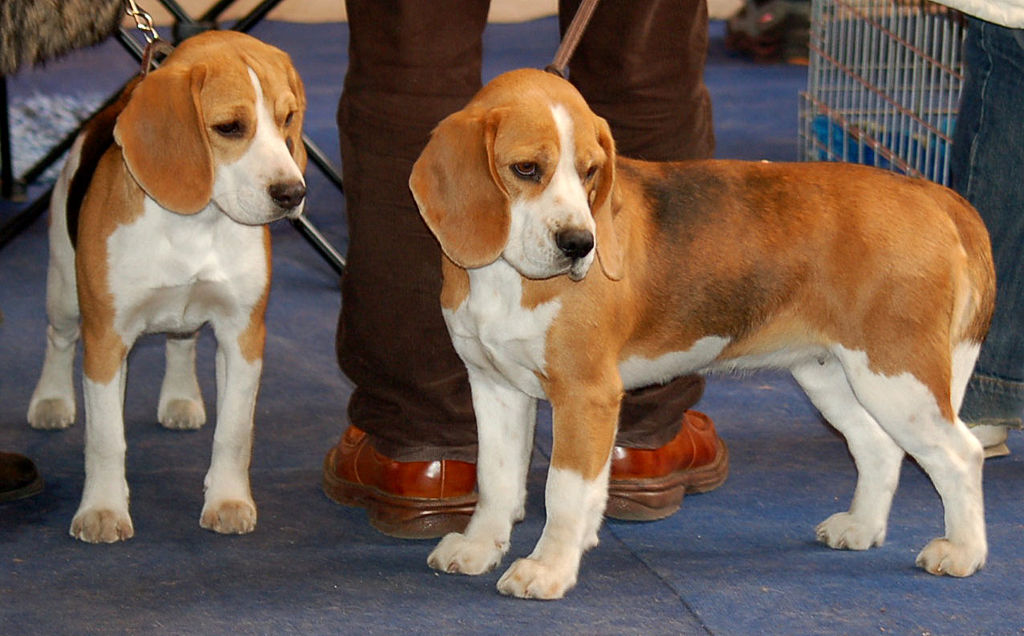

In [17]:
tf.keras.preprocessing.image.load_img('image1.jpg')

In [18]:
tf.keras.preprocessing.image.load_img('image2.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [19]:
#Model predictions for image1.jpg
detector_prediction('image1.jpg')

{'Box coordinates': array([[  28,   28,  539,  311],
        [  72,  390,  602, 1017],
        [   0,  213,  528,  706],
        [   0,  402,  165,  702],
        [   1,  546,  164,  721]]),
 'Classes': ['dog', 'dog', 'person', 'person', 'person'],
 'Masks': <tf.Tensor: shape=(5, 636, 1024), dtype=uint8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 

#### Visualizing Model Prediction

In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [21]:
def visualize_output(image_file, confidence_threshold=0.5):

    #Call model prediction function above
    output = detector_prediction(image_file, confidence_threshold=confidence_threshold)

    #Read image
    img = cv2.imread(image_file)
    
    #Draw rectangle for predicted boxes, also add predicted classes
    for i in range(output['Box coordinates'].shape[0]):

        #Mask
        mask = output['Masks'][i]

        #Draw mask
        colored_mask = np.expand_dims(mask, axis=2) * np.reshape([255, 255, 0], (1,1,3))
        img = cv2.addWeighted(colored_mask.astype('uint8'), 0.5, img, 1.0, 0.0)

        #Bounding box
        box = output['Box coordinates'][i]
        
        #Draw rectangle 
        img = cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), (0,255,0), 2)
        
        #Add Label - Class name and confidence level
        label = output['Classes'][i] + ': ' + str(round(output['Scores'][i],2))
        img = cv2.putText(img, label, (box[1], box[0]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    #Conver BGR image to RGB to use with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Display image
    plt.figure(figsize=(12,8))
    plt.imshow(img)
    plt.show()

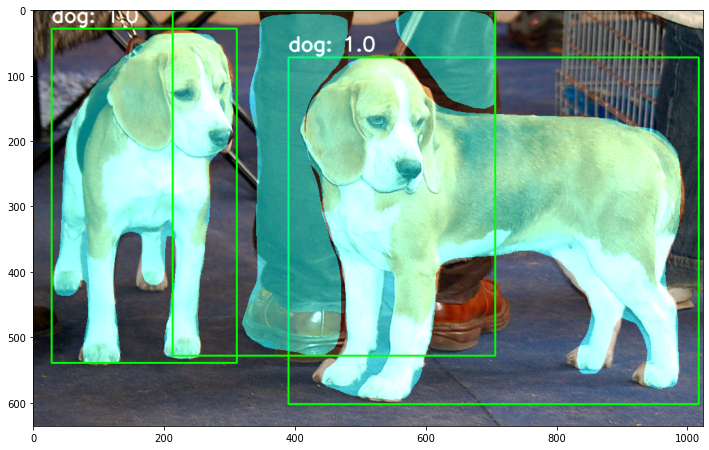

In [22]:
#Visualize first image
visualize_output('image1.jpg', confidence_threshold=0.9)

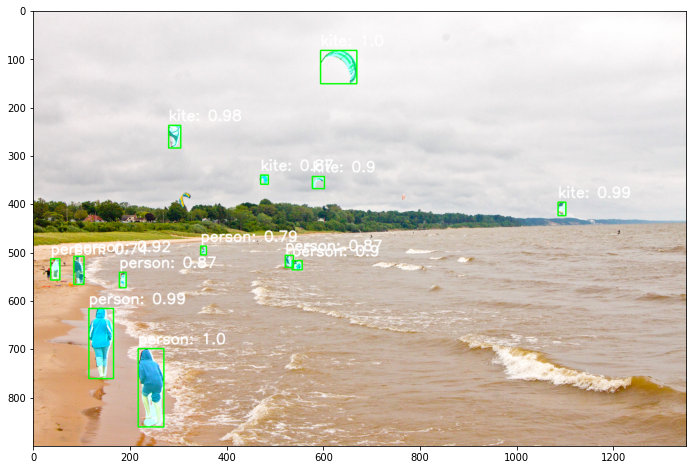

In [23]:
#Visualize second image
visualize_output('image2.jpg')

#### Extract Object(s) from an Image

Function to extract object(s) based on predicted boxes

In [24]:
def extract_object_from_box(image_file, object_name, confidence_threshold=0.5):

    #Call model prediction function above
    output = detector_prediction(image_file, confidence_threshold=confidence_threshold)

    #Read image
    img = cv2.imread(image_file)

    cropped_images = []

    #Draw rectangle for predicted boxes, also add predicted classes
    for i in range(output['Box coordinates'].shape[0]):

        #Class
        label = output['Classes'][i]

        if label.lower() == object_name.lower():

            #Bounding box
            box = output['Box coordinates'][i]

            #Crop image
            cropped_img = img[box[0]:box[2], box[1]:box[3]]
            cropped_images.append(cropped_img)
        
    
    if len(cropped_images) == 0:
        print('No ' + object_name + ' found')
        return
    
    print("Number of '" + object_name + " found:", len(cropped_images))
    plt.figure(figsize=(15,10))

    for i in range(len(cropped_images)):
        
        plt.subplot(1, len(cropped_images), i+1)
        plt.imshow(cv2.cvtColor(cropped_images[i], cv2.COLOR_BGR2RGB))
    
    plt.show()

Number of 'person found: 8


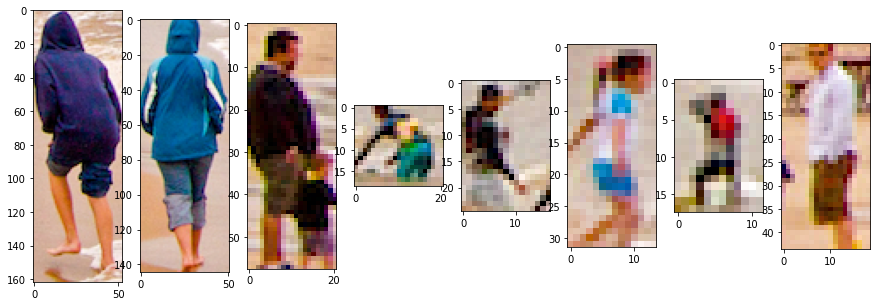

In [26]:
extract_object_from_box('image2.jpg', 'person')

Function to extract object(s) based on the mask

In [27]:
def extract_object_from_mask(image_file, object_name, confidence_threshold=0.5):

    #Call model prediction function above
    output = detector_prediction(image_file, confidence_threshold=confidence_threshold)

    #Read image
    img = cv2.imread(image_file)

    cropped_images = []

    #Draw rectangle for predicted boxes, also add predicted classes
    for i in range(output['Box coordinates'].shape[0]):

        #Class
        label = output['Classes'][i]

        if label.lower() == object_name.lower():

            #Mask
            mask = output['Masks'][i].numpy()
            mask = np.repeat(np.expand_dims(mask, axis=2), 3, axis=-1)*255

            
            #Crop image
            cropped_img = cv2.bitwise_and(img, mask)
            cropped_images.append(cropped_img)
        
    
    if len(cropped_images) == 0:
        print('No ' + object_name + ' found')
        return
    
    print("Number of '" + object_name + " found:", len(cropped_images))
    plt.figure(figsize=(15,10))

    for i in range(len(cropped_images)):
        
        plt.subplot(1, len(cropped_images), i+1)
        plt.imshow(cv2.cvtColor(cropped_images[i], cv2.COLOR_BGR2RGB))
    
    plt.show()

Number of 'dog found: 2


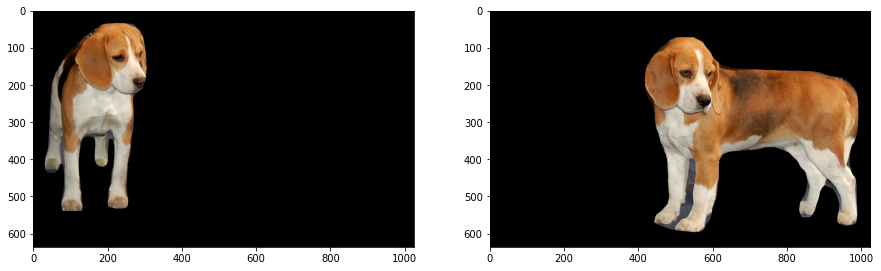

In [28]:
extract_object_from_mask('image1.jpg', 'dog')

In [36]:
detector_prediction('Group Photo.jpg')

{'Box coordinates': array([[ 491,  614,  877,  727],
        [ 528,  153,  891,  334],
        [ 491,  417,  876,  537],
        [ 534,  529,  874,  625],
        [ 589,  872,  870, 1047],
        [ 514,  718,  876,  833],
        [ 484, 1081,  857, 1213],
        [ 657, 1346,  878, 1430],
        [ 472, 1020,  864, 1115],
        [ 558,  199,  898,  390],
        [ 614,  251,  909,  440],
        [ 569, 1186,  871, 1318],
        [ 472, 1318,  741, 1447],
        [ 589,  803,  872,  902],
        [ 645, 1252,  871, 1336],
        [ 812,  310,  892,  394],
        [ 667,  241,  900,  350],
        [ 709,  894,  876, 1001]]),
 'Classes': ['person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'chair',
  'person',
  'chair'],
 'Masks': <tf.Tensor: shape=(18, 1067, 1600), dtype=uint8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
       

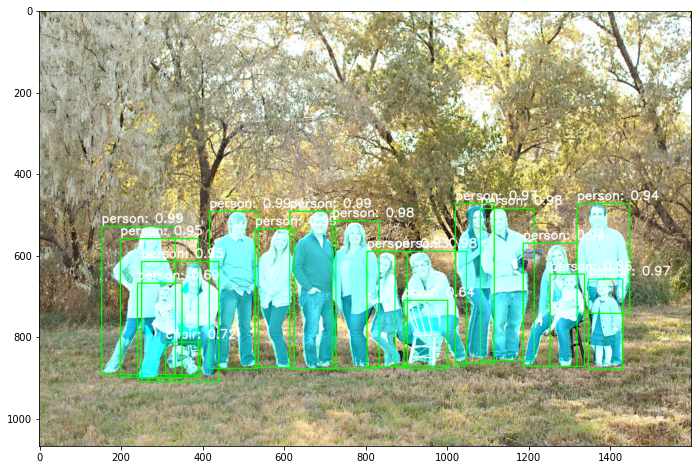

In [37]:
visualize_output('Group Photo.jpg')

Number of 'person found: 16


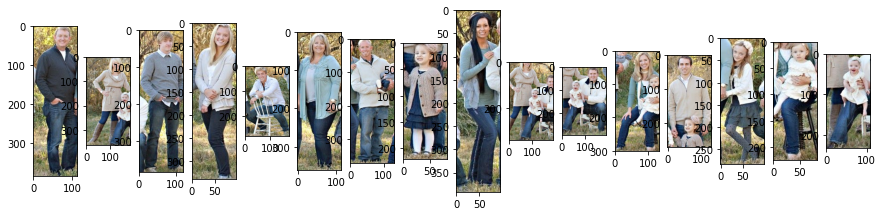

In [39]:
extract_object_from_box('Group Photo.jpg', 'person')

In [40]:
detector_prediction('Airport Crowd.jpg',0.1)

{'Box coordinates': array([[452, 415, 525, 458],
        [490, 330, 528, 374],
        [354, 842, 425, 914],
        [468, 498, 529, 535],
        [481,  61, 527, 119],
        [468, 722, 522, 779],
        [438, 609, 525, 655],
        [486,   0, 529,  56],
        [ 40,  37, 366, 897],
        [447, 377, 513, 410],
        [476, 839, 522, 883],
        [238, 300, 527, 914],
        [184,  14, 529, 427],
        [475, 797, 524, 847],
        [ 52,  39, 496, 594],
        [447, 272, 527, 308]]),
 'Classes': ['person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person',
  'person'],
 'Masks': <tf.Tensor: shape=(16, 529, 940), dtype=uint8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[

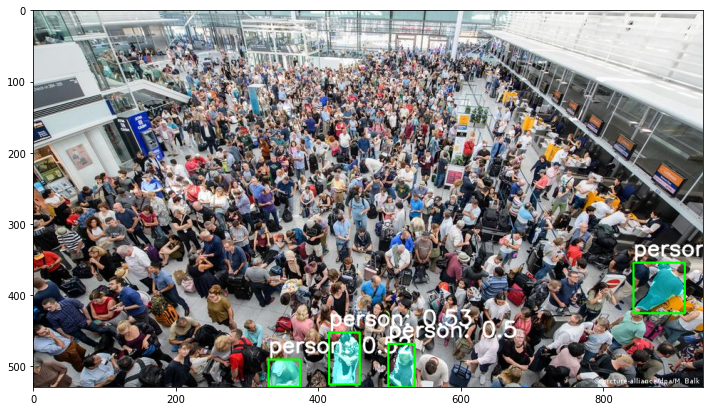

In [ ]:
visualize_output('Airport Crowd.jpg',0.5)

Number of 'person found: 4


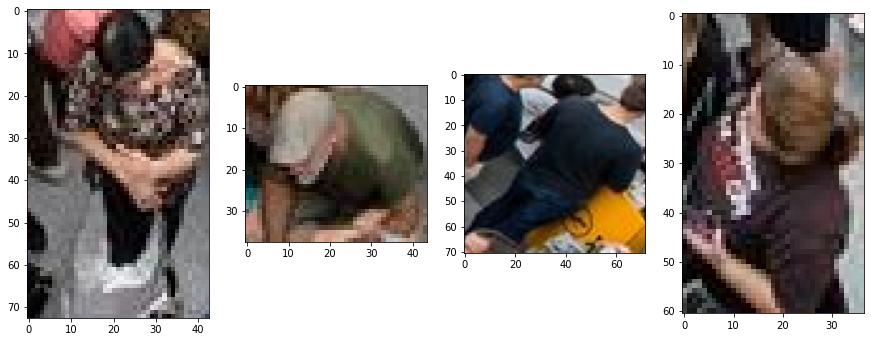

In [ ]:
extract_object_from_box('Airport Crowd.jpg', 'person')

In [41]:
detector_prediction('Airplane.jpg')

{'Box coordinates': array([[1214,  273, 1439, 1055],
        [ 805,  220, 1051,  970],
        [ 220, 1376,  354, 1921],
        [ 674, 1724,  875, 2394],
        [ 226,  228,  376,  753],
        [ 568,  281,  758,  915],
        [  23, 1242,  136, 1713],
        [ 365,  237,  542,  864],
        [  40,  343,  158,  704],
        [ 495, 1585,  675, 2211],
        [ 118,  232,  247,  725],
        [1181, 2094, 1419, 2550],
        [ 916, 1890, 1134, 2538],
        [ 332, 1476,  506, 2052],
        [1358, 1456, 1425, 1621],
        [1375, 1006, 1430, 1141]]),
 'Classes': ['airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'airplane',
  'bench',
  'truck'],
 'Masks': <tf.Tensor: shape=(16, 1440, 2560), dtype=uint8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ...,

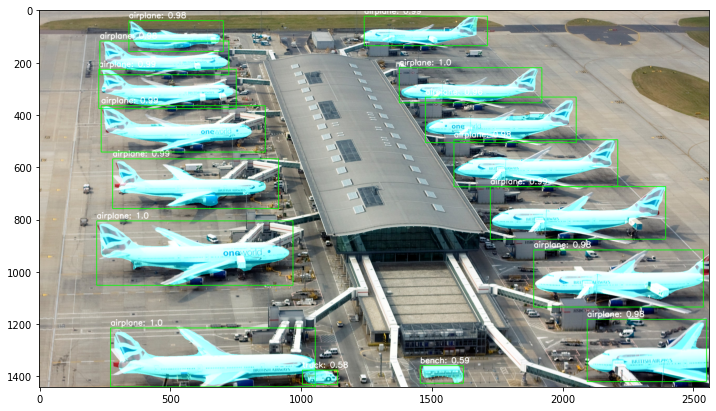

In [42]:
visualize_output('Airplane.jpg',0.5)

Number of 'airplane found: 14


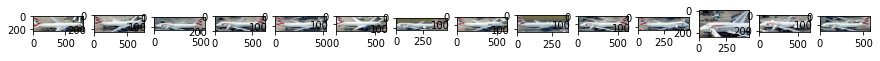

In [43]:
extract_object_from_box('Airplane.jpg', 'airplane')

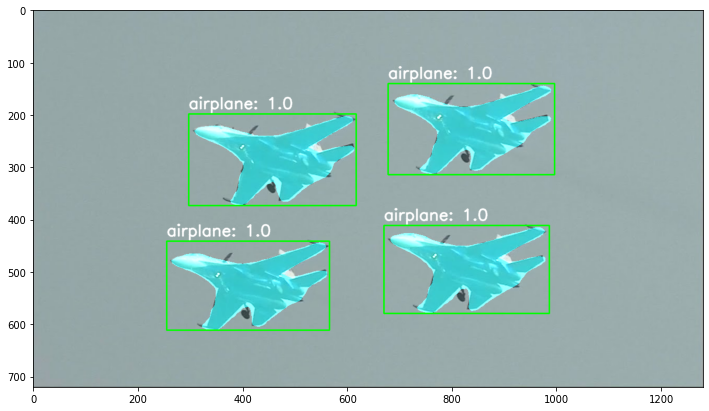

In [ ]:
visualize_output('Fighter Jet.jpg',0.5)

Number of 'airplane found: 4


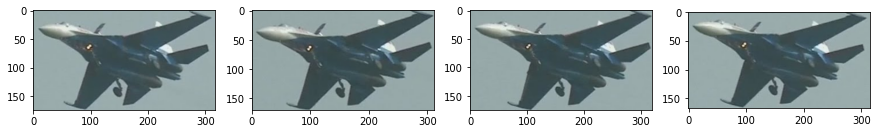

In [ ]:
extract_object_from_box('Fighter Jet.jpg', 'airplane')

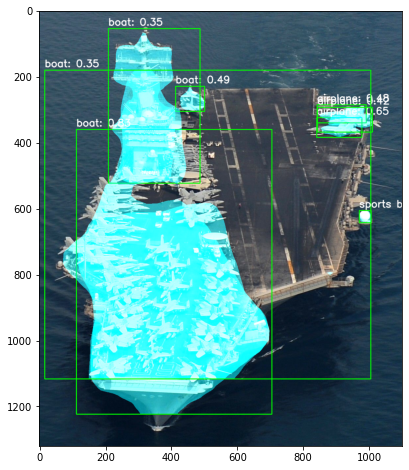

In [ ]:
visualize_output('Aircraft Carrier.jpg',0.1)

Number of 'airplane found: 1


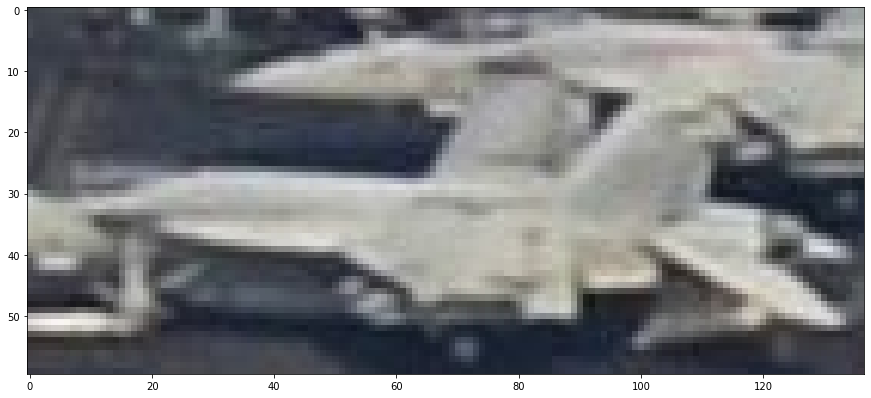

In [ ]:
extract_object_from_box('Aircraft Carrier.jpg', 'airplane')